# Trained on FairSIM Tested on Simulated

written by: Bereket Kebede <br>
Last updated: June 26, 2022 <br>

In [1]:
#############################################
# import neceassry libraries

import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import io
import skimage.io
import skimage.util
from tifffile import imsave
import scipy.ndimage
from skimage.measure import profile_line
import matplotlib.patches as patches

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import normalized_root_mse as nrmse

In [2]:
def normalize_volume(GT_image):
    clipped_data = GT_image.copy() # at channel 0
    clipped_data[clipped_data<0] = 0    #thresholding
    apodized_data = clipped_data - np.min(clipped_data)
    norm_3D_data = apodized_data/np.max(apodized_data)
    return norm_3D_data

In [3]:
os.getcwd()

'E:\\Bereket\\Research\\DeepLearning - 3D\\Thesis\\Results\\Trained on FairSIM Tested on Simulated'

In [4]:
my_list = UNET_3D, Ground_Truth, UNET_2D, Wide_Field = [r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_3D_24\add\config_1\full\Stitched_pred_stitched.tif",
                                                        r"E:\Bereket\Research\DeepLearning - 3D\Data\Simulated\StarLike\3D SIM\Truth_StarLike.tif",
                                                        r"E:\Bereket\Research\DeepLearning - 3D\Data\Data_2D_24\add\config_1\full\pred_stitched.tif",
                                                        r"E:\Bereket\Research\DeepLearning - 3D\Data\Simulated\StarLike\Wide Field\wide_field_star_like.tif"]

In [5]:
second_list = []
for i in my_list:
    second_list.append(io.imread(i))

In [6]:
print(second_list[0].shape)
print(second_list[1].shape)
print(second_list[2].shape)
print(second_list[3].shape)

(512, 512, 512)
(512, 512, 512)
(512, 512, 512)
(256, 256, 256)


In [7]:
print(second_list[0].dtype)
print(second_list[1].dtype)
print(second_list[2].dtype)
print(second_list[3].dtype)

float32
uint8
float32
float64


In [8]:
second_list[1] = second_list[1].astype(np.float32)

In [9]:
seconddd_list = []

for i in range(4):
    seconddd_list.append(normalize_volume(second_list[i]))

In [10]:
my_y_axis = io.imread(r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\utilities\axes\Lateral\512x512\lateral_axis_512_512.png")
my_z_axis = io.imread(r"E:\Bereket\Research\DeepLearning - 3D\Thesis\Results\utilities\axes\Axial\512x512\axial_axis_512_512.png")

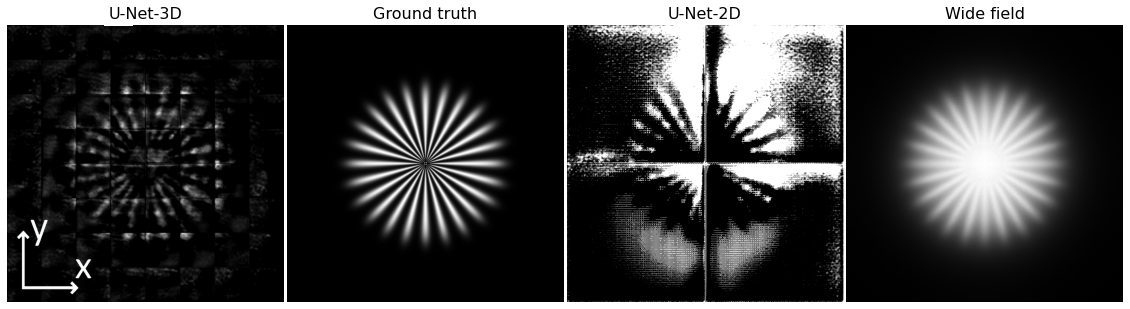

In [11]:
length = 50
move_x = 180

# profile line
start_2 = (second_list[0][11,768:1024,:].shape[0]//2,move_x)
end_2 = (second_list[0][11,768:1024,:].shape[0]//2, move_x+length)

########################################################################
############################################## Normal Figures
columns = 4
rows = 1

fig, ax = plt.subplots(rows, columns, figsize=(20, 6)) # setup the figures
plt.axis('off')

spoon = slice(768,1024)

count = 0
for i in range(4):
    depth = 255
    #if (i == 2):
        #depth = 128*15
    if (i == 3):
        depth = 128
    #print(i)
    ax[i].imshow(normalize_volume(seconddd_list[count][depth,:,:]), cmap = 'gray') #testing
    ax[0].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2) #Plot a red line across the film
    count+=1

for i in range(4):
    ax[i].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)

title_list = ["U-Net-3D","Ground truth", "U-Net-2D", "Wide field"]

count = 0
for i in range(columns):
    ax[i].set_title(title_list[count], fontsize =16)
    count+=1
    
ax[0].imshow(my_y_axis)
# newax = fig.add_axes([0.12,0.12,0.2,0.2], anchor='SE', zorder=1)
# newax.imshow(my_y_axis)

## Axial 

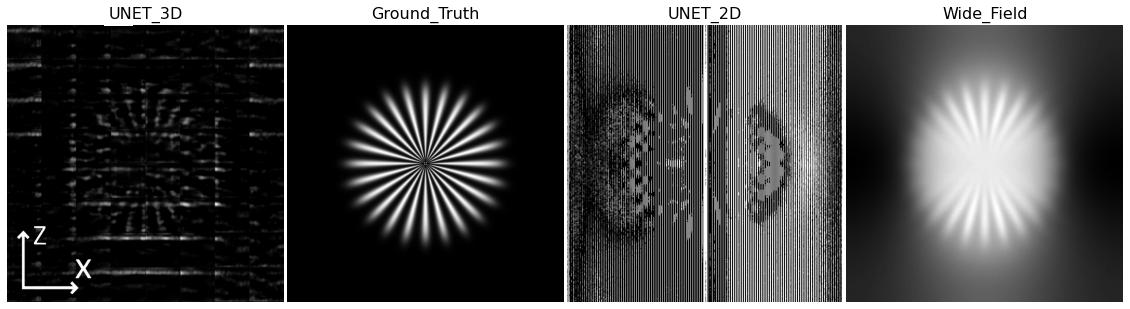

In [11]:
length = 50
move_x = 180

# profile line
start_2 = (second_list[0][11,768:1024,:].shape[0]//2,move_x)
end_2 = (second_list[0][11,768:1024,:].shape[0]//2, move_x+length)

########################################################################
############################################## Normal Figures
columns = 4
rows = 1

fig, ax = plt.subplots(rows, columns, figsize=(20, 6)) # setup the figures
plt.axis('off')
count = 0

for i in range(4):
    depth = 255
    #if (i == 2):
        #depth = 128*15
    if (i == 3):
        depth = 128
    #print(i)
    ax[i].imshow(normalize_volume(seconddd_list[count][:,depth,:]), cmap = 'gray') #testing
    ax[0].plot([start_2[1],end_2[1]],[start_2[0],end_2[0]], 'w-', lw=2) #Plot a red line across the film
    count+=1

for i in range(4):
    ax[i].axis('off')
    
plt.subplots_adjust(wspace=0.01, hspace=0)

title_list = ["UNET_3D","Ground_Truth", "UNET_2D", "Wide_Field"]

count = 0
for i in range(columns):
    ax[i].set_title(title_list[count], fontsize =16)
    count+=1

ax[0].imshow(my_z_axis)


## Volume comparison

In [21]:
# FOR 3d 

print('psnr: ',psnr(seconddd_list[0],seconddd_list[1]))
print('nrmse: ',nrmse(seconddd_list[0],seconddd_list[1]))
print('ssim: ',ssim(seconddd_list[0],seconddd_list[1]))

psnr:  21.967442576932402
nrmse:  1.6896673178434143
ssim:  0.6416966103565641


In [22]:
# For 2d

print('psnr: ',psnr(seconddd_list[2],seconddd_list[1]))
print('nrmse: ',nrmse(seconddd_list[2],seconddd_list[1]))
print('ssim: ',ssim(seconddd_list[2],seconddd_list[1]))

psnr:  6.164339432004791
nrmse:  0.9880348395293552
ssim:  0.38586265310841683


## Local Comparison

### Lateral

In [15]:
# FOR 3d 

depth = 255

print('psnr: ',psnr(seconddd_list[0][depth,:,:],seconddd_list[1][depth,:,:]) )
print('nrmse: ',nrmse(seconddd_list[0][depth,:,:],seconddd_list[1][depth,:,:]) )
print('ssim: ',ssim(seconddd_list[0][depth,:,:],seconddd_list[1][depth,:,:]))

psnr:  13.569246945099117
nrmse:  6.527953432418226
ssim:  0.6413954064680105


In [16]:
# FOR 2d 

depth = 255

print('psnr: ',psnr(seconddd_list[2][depth,:,:],seconddd_list[1][depth,:,:]) )
print('nrmse: ',nrmse(seconddd_list[2][depth,:,:],seconddd_list[1][depth,:,:]) )
print('ssim: ',ssim(seconddd_list[2][depth,:,:],seconddd_list[1][depth,:,:]))

psnr:  5.890147429721867
nrmse:  0.9688514301468434
ssim:  0.2643268209461509


###  Axial

In [18]:
# FOR 3d 

depth = 255

print('psnr: ',psnr(seconddd_list[0][:,depth,:],seconddd_list[1][:,depth,:]) )
print('nrmse: ',nrmse(seconddd_list[0][:,depth,:],seconddd_list[1][:,depth,:]) )
print('ssim: ',ssim(seconddd_list[0][:,depth,:],seconddd_list[1][:,depth,:]))

psnr:  13.5122380209668
nrmse:  3.324727850156201
ssim:  0.5526091372871604


In [19]:
# FOR 2d 

depth = 255

print('psnr: ',psnr(seconddd_list[2][:,depth,:],seconddd_list[1][:,depth,:]) )
print('nrmse: ',nrmse(seconddd_list[2][:,depth,:],seconddd_list[1][:,depth,:]) )
print('ssim: ',ssim(seconddd_list[2][:,depth,:],seconddd_list[1][:,depth,:]))

psnr:  5.261978491659841
nrmse:  0.9763488752741418
ssim:  0.011841324217740668
